# <a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/08-Random-Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest

En esta notebook analizaremos el clasificador Random Forest. Adem√°s, exploraremos la naturaleza colectiva de su funcionamiento analizando elementos individuales del ensamble.

Recuerda la simbolog√≠a de las secciones:

* üîΩ Esta secci√≥n no forma parte del proceso usual de Machine Learning. Es una exploraci√≥n did√°ctica de alg√∫n aspecto del funcionamiento del algoritmo.
* ‚ö° Esta secci√≥n incluye t√©cnicas m√°s avanzadas destinadas a optimizar o profundizar en el uso de los algoritmos.
* ‚≠ï Esta secci√≥n contiene un ejercicio o pr√°ctica a realizar. A√∫n si no se establece una fecha de entrega, es muy recomendable realizarla para practicar conceptos clave de cada tema.


<img src="https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/img/random-forest.jpeg">

## Ejemplo 1: MNIST

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

clf = RandomForestClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(f"Accuracy entrenamiento: {clf.score(X_train,y_train)}")
print(f"Accuracy prueba: {clf.score(X_test,y_test)}")

Accuracy entrenamiento: 1.0
Accuracy prueba: 0.9740740740740741


Observa como ya no tenemos se√±ales de overfitting como en el caso del Decision Tree.

Accuracy: 0.974
Recall: 0.975
Precision: 0.975


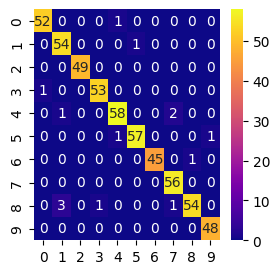

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred, average='macro'),3)}")
print(f"Precision: {round(precision_score(y_test,y_pred, average='macro'),3)}")

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g')
plt.show()

## Ejemplo 2: PIMA dataset

### El conjunto de datos

Este dataset fue creado por el *National Institute of Diabetes and Digestive and Kidney Diseases* de Estados Unidos. El objetivo del dataset es predecir el diagnostico de cu√°ndo un paciente tiene diabetes o no, basado en ciertas mediciones incluidas en el dataset. Varias restricciones fueron usadas en la selecci√≥n de estas instancias para filtrar el dataset. En particular, se trata pacientes femeninas de al menos 21 a√±os de edad pertenecientes al grupo ind√≠gena Pima de Arizona.

Las variables incluidas son el numero de embarazos la paciente ha tenido, su BMI, nivel de insulina, edad, entre otras.

El dataset se encuentra en https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.

In [ ]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/diabetes.csv'
df = pd.read_csv(url,index_col=0)
df

pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
763        10      101  76    48      180  32.9     0.171   63      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]

### Preprocesamiento y Entrenamiento

In [ ]:
# ----- Definimos las features
feature_cols = df.columns.to_list()

X = df[feature_cols].values    # Features
y = df['label'].values         # Target variable

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

clf = RandomForestClassifier(n_jobs=-1)

clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)    # Predecimos usando el conjunto de prueba

¬øC√≥mo lo hizo en el conjunto de prueba?

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

y_train_pred = clf.predict(X_train)

print(f"Accuracy: {round(accuracy_score(y_train,y_train_pred),3)}")
print(f"Recall: {round(recall_score(y_train,y_train_pred),3)}")
print(f"Precision: {round(precision_score(y_train,y_train_pred),3)}")

print(f"Accuracy, usando el m√©todo score: {clf.score(X_train,y_train)}")

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
Accuracy, usando el m√©todo score: 1.0


### Resultados

Accuracy: 1.0
Recall: 1.0
Precision: 1.0


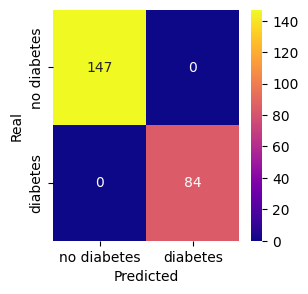

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(f"Accuracy: {round(accuracy_score(y_test,y_pred),3)}")
print(f"Recall: {round(recall_score(y_test,y_pred),5)}")
print(f"Precision: {round(precision_score(y_test,y_pred),3)}")

target_labels = ['no diabetes','diabetes']

plt.figure(figsize=(3,3))
cm = confusion_matrix(y_test,y_pred)
s_cm = sns.heatmap(cm,cmap='plasma',annot=True, fmt='g',
            xticklabels=target_labels,
            yticklabels=target_labels)
s_cm.set(xlabel='Predicted',ylabel='Real')
plt.show()

Podemos obtener la importancia de las features de acuerdo a la reducci√≥n de impureza de los nodos donde participan.

In [ ]:
import numpy as np

importances = pd.DataFrame({'feature':feature_cols,'importancia':np.round(clf.feature_importances_,3)})
importances.sort_values(by='importancia',ascending=False,inplace=True)
importances.set_index('feature')

importancia
feature              
label           0.786
glucose         0.089
bmi             0.040
age             0.036
pedigree        0.017
pregnant        0.010
insulin         0.008
skin            0.007
bp              0.006

### üîΩ Exploraci√≥n del random forest

Podemos explorar el conjunto de √°rboles de decisi√≥n construidos por el random forest mediante la lista `estimators_`. Cada elemento de esta lista es un √°rbol de decisi√≥n como los que usamos la sesi√≥n pasada.

¬øCu√°ntos √°rboles se usaron?

In [ ]:
print(f"N√∫mero de √°rboles: {len(clf.estimators_)}")

N√∫mero de √°rboles: 100


Analicemos la predicci√≥n para un elemento arbitrario de X_test

In [ ]:
import numpy as np

idx0 = 37
new_x = X_test[idx0]
print(f"Etiqueta real: {y_test[idx0]}, Preddici√≥n: {y_pred[idx0]}")

predicciones = []
for dt in clf.estimators_:
    predicted_label = int(dt.predict([X_test[idx0]])[0])  # No podemos pasar s√≥lo un rengl√≥n de X_test, tiene que ser una matriz, por lo que pasamos una matriz de tama√±o 1 x num_features
    predicciones.append(predicted_label)

# #Usando list comprehension:
# predicciones = [int(dt.predict([X_test[idx0]])[0]) for dt in clf.estimators_]

print(f"Las primeras 10 predicciones: {predicciones[:10]}")

# ---- Contamos cu√°ntos votos tuvo cada etiqueta por parte del bosque ----

zeros = np.where(np.array(predicciones)==0)[0]
ones = np.where(np.array(predicciones)==1)[0]

print(f"{zeros.shape[0]} √°rboles que predijeron la etiqueta 0:\n{zeros}\n")
print(f"{ones.shape[0]} √Årboles que predijeron la etiqueta 1:\n{ones}\n")

Etiqueta real: 0, Preddici√≥n: 0
Las primeras 10 predicciones: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
100 √°rboles que predijeron la etiqueta 0:
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]

0 √Årboles que predijeron la etiqueta 1:
[]



Exploremos un √°rbol arbitrario del ensamble.

In [ ]:
from sklearn import tree

dt = clf.estimators_[1]

print(f"Profundidad del √°rbol: {dt.get_depth()}")
print(f"N√∫mero de hojas del √°rbol: {dt.get_n_leaves()}")

text_representation = tree.export_text(decision_tree=dt,
                                    feature_names=feature_cols)
# print(text_representation)

Profundidad del √°rbol: 4
N√∫mero de hojas del √°rbol: 8


Exploremos estad√≠sticamente todos los √°rboles individuales del ensamble

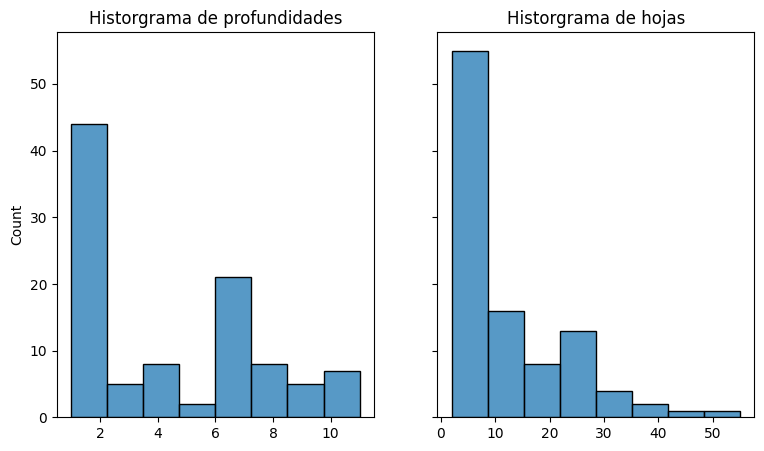

In [ ]:
import seaborn as sns

profundidades = [dt.get_depth() for dt in clf.estimators_]
hojas = [dt.get_n_leaves() for dt in clf.estimators_]

fig, axs = plt.subplots(1,2,figsize=(9,5),sharey=True)
axs[0].set_title("Historgrama de profundidades")
sns.histplot(profundidades,ax=axs[0])
axs[1].set_title("Historgrama de hojas")
sns.histplot(hojas,ax=axs[1])
fig.show()


## Comparaci√≥n con el DecisionTreeClassifier

### ‚≠ï **Pr√°ctica**:

Este es un peque√±o ejercicio para pr√°cticar la comparaci√≥n de dos modelos y el uso de atributos de clases.

1. Encuentra el √°rbol del ensamble con el mejor rendimiento del ensamble del bosque aleatorio, esto con respecto al accuracy
2. Comp√°ralo con el mejor √°rbol de decisi√≥n que obtuviste en la sesi√≥n pasada:
    * Compara la profundidad y n√∫mero de hojas de ambos.
    * Compara los rendimientos de ambos usando las m√©tricas Accuracy, Precision, Recall y F1-score.
    * Compara las matrices de confusi√≥n de ambos.